In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import optimize
from scipy.optimize import minimize

# 1)

In [12]:
# In order to solve equation 1, a for loop that finds the optimal l and c which maximizes utility is set up

def solution_1(v, epsilon, m, w, tau_0, tau_1, kappa):
    
    # Defining best utility to be a very low number
    #This is used later on to maximize utility in the loop
    best_utility = -1e9
    
    # Defining the range for l to be between 0 and 1 with 50 samples
    l_range = np.linspace(0,1,50)
    for l in l_range:
        # Defining x to be the function given in the execise
        x = m + w*l - (tau_0*w*l + tau_1*max(w*l - kappa, 0))
        # Defining the range for c to be between 0 and x with 50 samples
        c_range = np.linspace(0,x,50)
        #looping over c
        for c in c_range:
            utility = np.log(c)-v*(l**(1+1/epsilon))/(1+(1/epsilon))
            # maximizing utility to find optimal c and l
            if utility > best_utility:
                best_utility = utility 
                c_optimal = c
                l_optimal = l
    return c_optimal, l_optimal

# Solution_1 will now solve equation 1

# 2)

In [13]:
# Assigning parameters with the given values from the exercise 
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

# Defining w's range to be from 0.5 to 1.5 again with 50 samples
w_range = np.linspace(0.5,1.5,50)

# Creating empty lists for c and l
c_list = []
l_list = []

# Calling the solution_1 to find the optimal l and c for w in range 0.5 to 1
for w in w_range:
    c,l = solution_1(v, epsilon, m, w, tau0, tau1, kappa)
    # Appending the optmal l and c to the empty lists
    c_list.append(c)
    l_list.append(l)
    
# Converting the w array into a list
w_range_list = w_range.tolist()





/Users/emma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


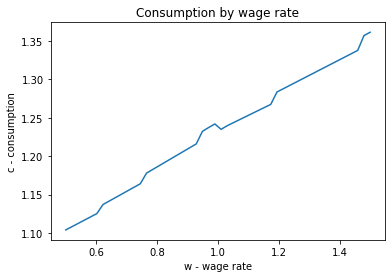

In [14]:
# Naming the x axis 
plt.xlabel('w - wage rate') 

# Naming the y axis 
plt.ylabel('c - consumption') 
  
# Creating a title 
plt.title('Consumption by wage rate') 
 
# Plotting w on the x axis and c on the y axis
plt.plot(w_range_list,c_list)


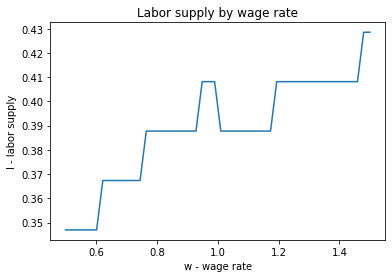

In [15]:
# Naming the x axis 
plt.xlabel('w - wage rate') 

# Naming the y axis 
plt.ylabel('l - labor supply') 
  
# Creating a title 
plt.title('Labor supply by wage rate') 

# Plotting w on the x axis and l on the y axis
plt.plot(w_range_list,l_list)

# 3)

In [16]:
# Drawing w from a uniform distribution within the range of 0.5 to 1.5 and with a population of 10,000

w_sample = np.random.uniform(0.5,1.5,size=10000) 

In [17]:
# Setting tax revenue to be 0
T = 0

# Setting up a loop to sum over tax revenue for all persons
for w in w_sample:
    c,l = solution_1(v, epsilon, m, w, tau0, tau1, kappa)

    # Here we sum over all tax revenues  
    T = T + tau0*w*l + tau1*max(w*l-kappa, 0) 


/Users/emma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [73]:
print("Total tax revenue:", T)

Total tax revenue: 1631.8580657325847


# 4)

In [18]:
# Setting epsilon to equal 0.1 and repeating the method from question 3
epsilon = 0.1
T = 0
for w in w_sample:
    c,l = solution_1(v, epsilon, m, w, tau0, tau1, kappa)
    T = T + tau0*w*l + tau1*max(w*l-kappa, 0)


/Users/emma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [19]:
print("Total tax revenue'", T)

Total tax revenue' 3176.0903449858743


# 5)

In [ ]:
# Solving the maximazation with a loop takes too much time and therefore the SciPy optimizer is used instead

w_sample = np.random.uniform(0.5,1.5,size=10000) 

# Defining variables as a vectors
def revenue(lst):
    tau0 = lst[0]
    tau1 = lst[1]
    kappa = lst[2]
    c = np.empty(10000)
    l = np.empty(10000)
    i = 0
    for w in w_sample:
        c[i],l[i] = solution_1(v, epsilon, m, w, tau0, tau1, kappa)
        i=i+1
                
    # Setting up the tax revenue as given in the instructions
    T = np.sum(tau0*w_sample*l + tau1*np.max(w_sample*l - kappa,0))
    return -T
# The tax revenue is returned negative.
# By making the revenue negative, we can apply the minimize call which will find the optimal tax revenue.


# The inital guess is set to be the given values from question 2 and bounds are also set
inital_guess = [0.4, 0.1, 0.4]
bounds = ((0,1),(0,1),(0,1))

result = minimize(revenue, inital_guess, bounds=bounds, method='SLSQP')

# Unpacking the solution
tau0_sol = result.lst[0]
tau1_sol = result.lst[1]
kappa_sol = result.lst[2]
revenue_sol = revenue
print(f'tau0: {tau0_sol*100:.1f}%')
print(f'Top bracket labour income tax: {tau1_sol*100:.1f}%')
print(f'Cut-off for top labour income: {kappa_sol:.1f}')

# Unfortunately it still takes a very long time to run. 
# We assume that it is done correctly, but that we should have solved question 1 with SciPy instead.
# Then it may have taken shorter time, as it is the call of solution_1 which takes time.